In [ ]:
import numpy as np
import pandas as pd

In [48]:
# Ignoring the Harmless Warnings
import warnings
warnings.filterwarnings("ignore")

In [49]:
from statsmodels.tsa.arima_model import ARMA, ARMAResults, ARIMA, ARIMAResults

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [51]:
from pmdarima import auto_arima

In [52]:
# Impoting the Data sets

In [53]:
# Daily Female Bith Data Set

fem_birth = pd.read_csv("Data/DailyTotalFemaleBirths.csv", index_col='Date', parse_dates=True)
fem_birth.index.freq = 'D'

#Taking only the first 4 months Data, To remove the Seasionality componnent, To be Fit in ARMA Model
fem_birth = fem_birth.iloc[:120]


In [54]:
# Trade Inventories Data

trade_invnt =  pd.read_csv("Data/TradeInventories.csv", index_col='Date', parse_dates=True)
trade_invnt.index.freq = 'MS'

## <font Color = Red> ARMA

<AxesSubplot:xlabel='Date'>

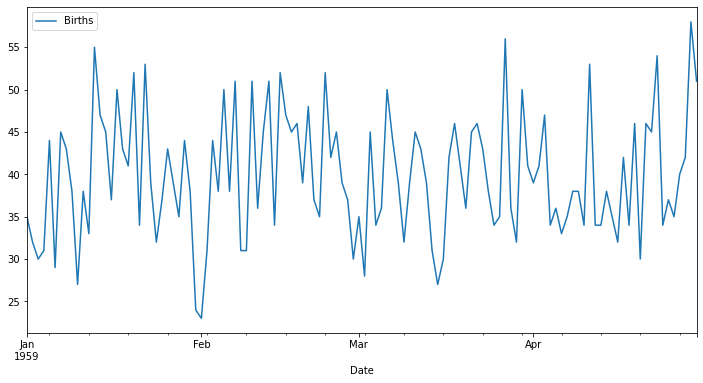

In [55]:
# Ploting The female Birth Rate Data Set

fem_birth.plot(figsize=(12,6))

In [56]:
# Runnuning the AUgmented Dicky Fuller Test

# Creating A generalus function to Run a Dicky fuller test on any data set

from statsmodels.tsa.stattools import adfuller
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [57]:
# Performaing a ADF test on fem_bith Data

adf_test(fem_birth['Births'], "Daily Female Birth Rate")

Augmented Dickey-Fuller Test: Daily Female Birth Rate
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [58]:
# Perfornming Auto ARIMA on the Data set

auto_arima(fem_birth['Births'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=1.48 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.28 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.39 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 3.289 seconds


ARIMA(order=(0, 0, 0), scoring_args={}, suppress_warnings=True)

In [59]:
auto_arima(fem_birth['Births'], start_p=2, start_q=2, max_p=2, max_q=2, seasonal=False, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1230.607, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=896.926, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=1121.103, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=824.647, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=823.489, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=824.747, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=826.399, Time=0.41 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.693 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Sun, 10 Jan 2021   AIC                            823.489
Time:                        14:19:54   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.36   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<font color = blue> <b> Train-Test Split

In [21]:
fem_birth_train = fem_birth.iloc[:90]
fem_birth_test = fem_birth.iloc[90:]

In [65]:
# performing the ARMA(2,2) model

model = ARMA(fem_birth_train['Births'], order=(1,1))
results =  model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(1, 1)   Log Likelihood                -307.967
Method:                       css-mle   S.D. of innovations              7.410
Date:                Sun, 10 Jan 2021   AIC                            623.934
Time:                        14:22:31   BIC                            633.934
Sample:                    01-01-1959   HQIC                           627.967
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7561      0.907     43.817      0.000      37.978      41.534
ar.L1.Births     0.4879      0.810      0.603      0.547      -1.099       2.075
ma.L1.Births    -0.4038      0.845     -0.478      0.633      -2.060       1.253
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.0497           +0.0000j            2.0497            0.0000
MA.1            2.4766           +0.0000j            2.4766            0.0000
-----------------------------------------------------------------------------
"""

In [1]:
# Predicting on the Test Data

start = len(fem_birth_train)
end = len(fem_birth_train) + len(fem_birth_test) - 1  #Removing Indexing Out POF bound Error

predictions = results.predict(start, end).rename("ARMA(2,2)-Predictions")

predictions

# All the Prediction a hovering arround the mean

NameError: name 'fem_birth_train' is not defined

<AxesSubplot:xlabel='Date'>

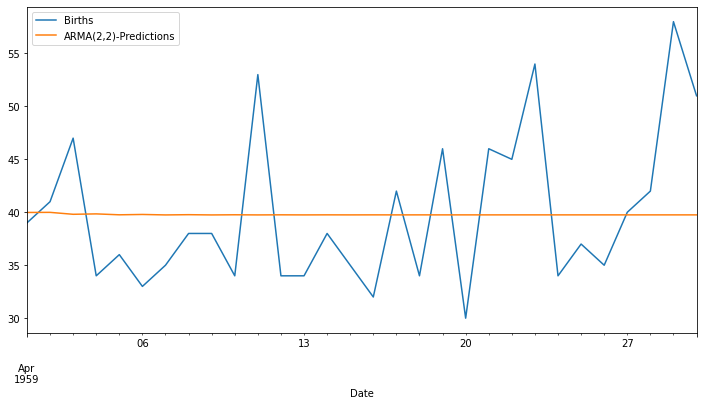

In [28]:
# Plotting the Test data vs Prediction

fem_birth_test['Births'].plot(figsize=(12,6), legend=True)
predictions.plot(legend=True)

In [42]:
# Comparing the Mean of Test and Predicted Values

print("Mean Of Test Data: ", fem_birth_test.mean())
print("Mean Of Predicted Data: ", predictions.mean())

Mean Of Test Data:  Births    39.833333
dtype: float64
Mean Of Predicted Data:  39.77743209274586


In [43]:
# performing the ARMA(0,0) model

model1 = ARMA(fem_birth_train['Births'], order=(0,0))
results1 =  model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(0, 0)   Log Likelihood                -308.379
Method:                           css   S.D. of innovations              7.445
Date:                Sat, 09 Jan 2021   AIC                            620.759
Time:                        23:34:53   BIC                            625.759
Sample:                    01-01-1959   HQIC                           622.775
                         - 03-31-1959                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7667      0.785     50.675      0.000      38.229      41.305
==============================================================================
"""

In [1]:
#pred = results1.predict(start,end)